In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt
target_col = 'RainTomorrow'

In [36]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

In [37]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
numeric_cols = pd.read_parquet('numeric_cols.parquet')
numeric_cols = numeric_cols[0].to_list()
encoded_cols = pd.read_parquet('encoded_cols.parquet')
encoded_cols = encoded_cols[0].to_list()

# numeric_cols
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(solver='liblinear')

In [41]:
model.fit(train_inputs[numeric_cols+encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [42]:
print(numeric_cols+encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [43]:
print(model.coef_.tolist())

[[0.9829512751169759, -1.6136118852245391, 3.257022245688665, 0.7390447793463976, -1.6657335904476576, 6.712790049954451, -0.8945757850960881, -1.478702160353818, 0.5085586950377786, 5.668982376626529, 5.75106015941066, -9.442001255942722, -0.15422727618311202, 1.2692549844395657, 0.9608572482556345, 0.5968060881932643, -0.5433642536855583, 0.4840918246938204, 0.01262997799950887, 0.3420928527704055, -0.35029270801110646, 0.18144628514354796, 0.4258669398172326, -0.004897644426244758, 0.015433088217005564, 0.25380518947963937, -0.018367770295090742, -0.030489173231830598, -0.4672883406176155, -0.14419675475032062, -0.590823832194162, -0.744649323126951, -0.24989627919454954, -0.3286905584079172, -0.5709422610965065, 0.08019398106943015, 0.01404033825247823, 0.059951703842317614, -0.8771171924948253, -0.44146524985291996, 0.011846574464646762, -0.4594917574609295, -0.46018655916750706, -0.0746947919458379, 0.19459856612171098, 0.4456784827077769, 0.6073734658499066, 0.43039842570602027,

In [44]:
print(model.intercept_)

[-2.3639384]


In [45]:
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'feature': (numeric_cols+encoded_cols),
    'weight': model.coef_.tolist()[0]
})

<Axes: xlabel='weight', ylabel='feature'>

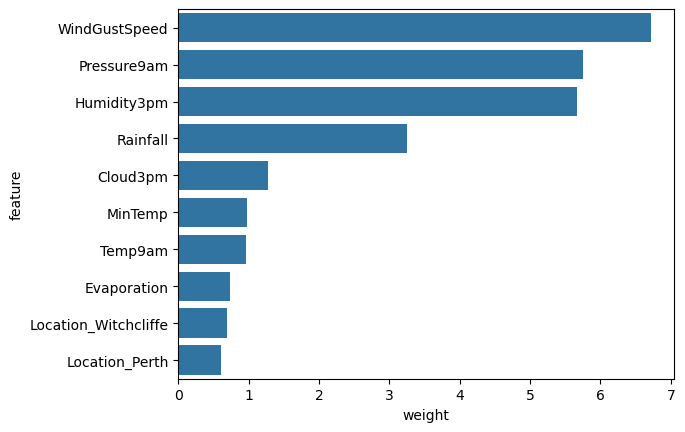

In [50]:
sns.barplot(data=weight_df.sort_values(
    'weight', ascending=False).head(10), x='weight', y='feature')

Make predictions and Evaluate Model

In [51]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [52]:
train_preds = model.predict(X_train)

In [53]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [54]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Accuracy

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(train_targets, train_preds)

0.8519002326815528

In [57]:
# If wanted to check probabilities appearing as 
# Yes & No classes
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93950671, 0.06049329],
       [0.94333139, 0.05666861],
       [0.95980378, 0.04019622],
       ...,
       [0.98729947, 0.01270053],
       [0.98357972, 0.01642028],
       [0.87598615, 0.12401385]])

In [58]:
model.classes_

array(['No', 'Yes'], dtype=object)

Handling Missclassification

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

In [61]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 85.19%


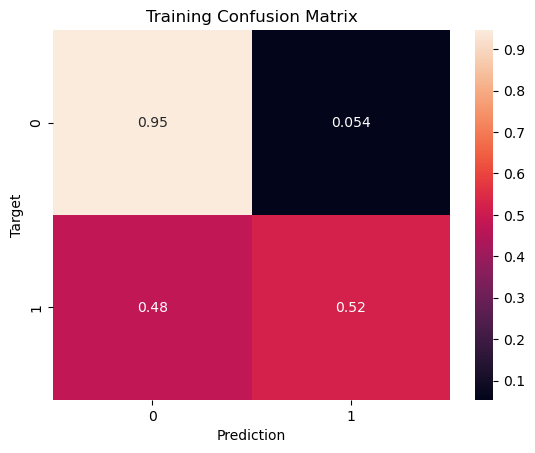

In [62]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.41%


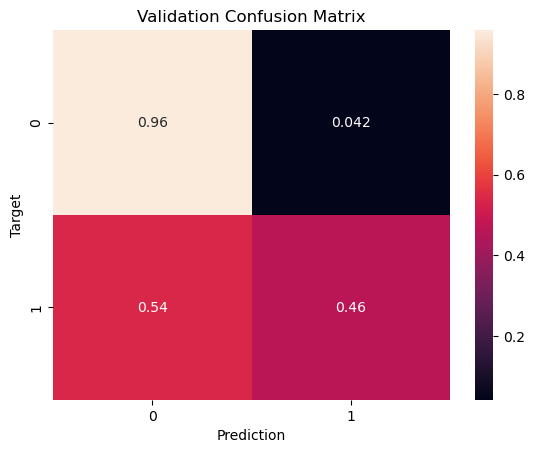

In [63]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 84.25%


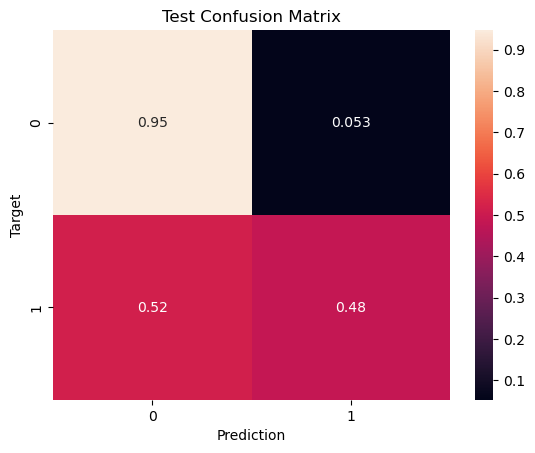

In [64]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Random Guess

In [65]:
def random_guess(inputs):
    return np.random.choice(['No', 'Yes'], len(inputs))

In [66]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [67]:
random_guess(X_val)

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype='<U3')

In [68]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [69]:
accuracy_score(test_targets, random_guess(X_test))

0.4956826137689615

In [70]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

### Saving & Loading Trained Models

In [75]:
import joblib

In [76]:
aussie_rain = {
    'model': model,
    # 'imputer': imputer,
    # 'scaler': scaler,
    # 'encoder': encoder,
    # 'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    # 'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [77]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [78]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [79]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8424737456242707